In [1]:
# This is to access the package without it being installed for testing.
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))

In [2]:
from pylossmap.loader import LossMapFetcher
from pylossmap.data import BLMDataADT
from pylossmap.data import BLMDataCycle
from pylossmap.utils import to_datetime
from pylossmap.utils import row_from_time
from pylossmap.plotting import plot_loss_map

/home/lcoyle/anaconda2/envs/loss_maps/lib/python3.7/site-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [3]:
import pytimber
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
db = pytimber.LoggingDB()
fetcher = LossMapFetcher()

In [5]:
t1 = pd.to_datetime('2018-06-01 00:00:00').tz_localize('Europe/Zurich')
t2 = pd.to_datetime('2018-06-04 00:00:00').tz_localize('Europe/Zurich')

In [6]:
def OP_LM_plot(fills, beam_mode):
    for f in fills:
        for m in f['beamModes']:
            if m['mode'] == beam_mode:
                start_time = m['startTime']
                end_time = m['endTime']

        BLM_data = fetcher.from_datetimes(start_time, end_time)
        BLM_data = BLMDataCycle.from_BLM_data(BLM_data)
        BLM_data.plot(title=f'{beam_mode}')
        BLM_data.get_beam_meta('intensity', beam=1).plot()
        BLM_data.get_beam_meta('intensity', beam=2).plot()
        for idx, blms in BLM_data.iter_max():
            LM = BLM_data.loss_map(row=BLM_data.data.loc[idx],
                                   datetime=idx[1],
                                   background='fetch')
            LM = LM.clean_bg().normalize()
            LM.plot(title=f'{idx[1]}\n{blms}')
        plt.show()

# INJPHYS

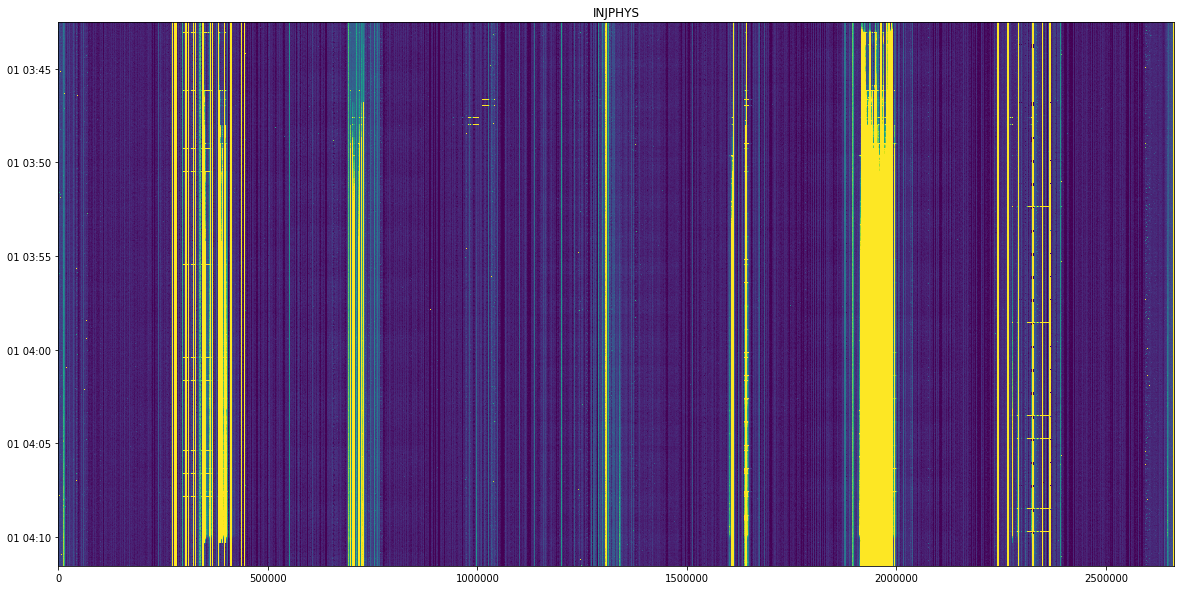

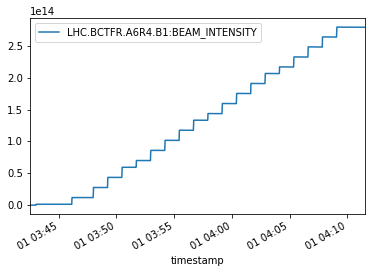

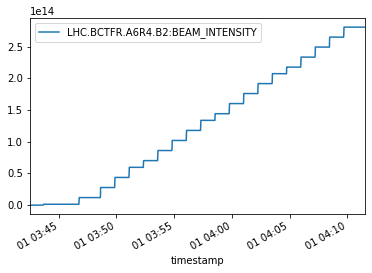

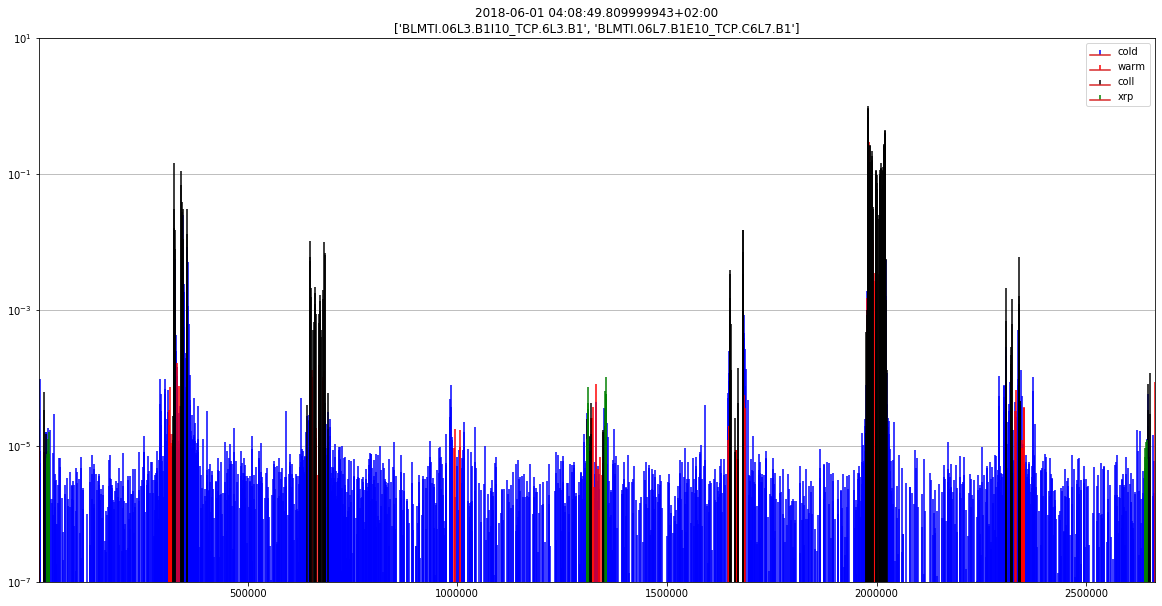

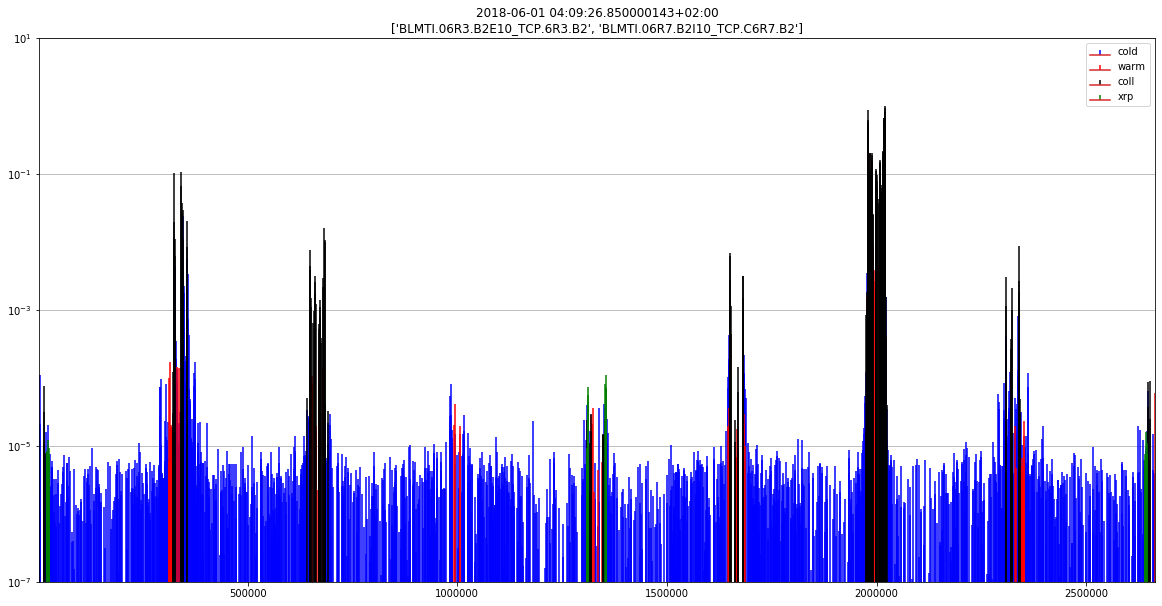

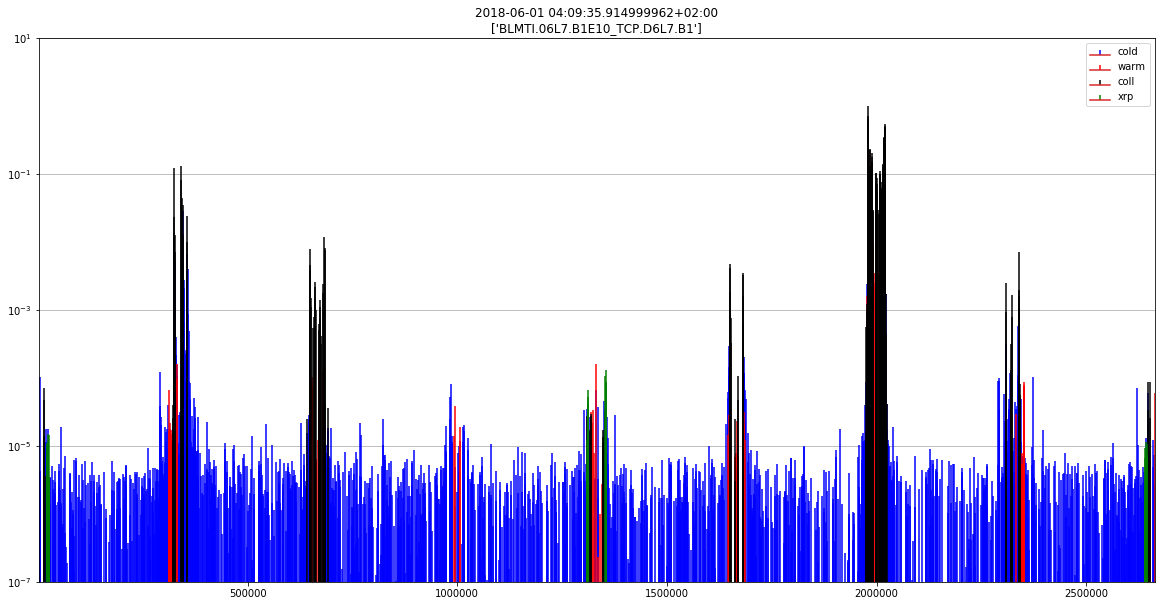

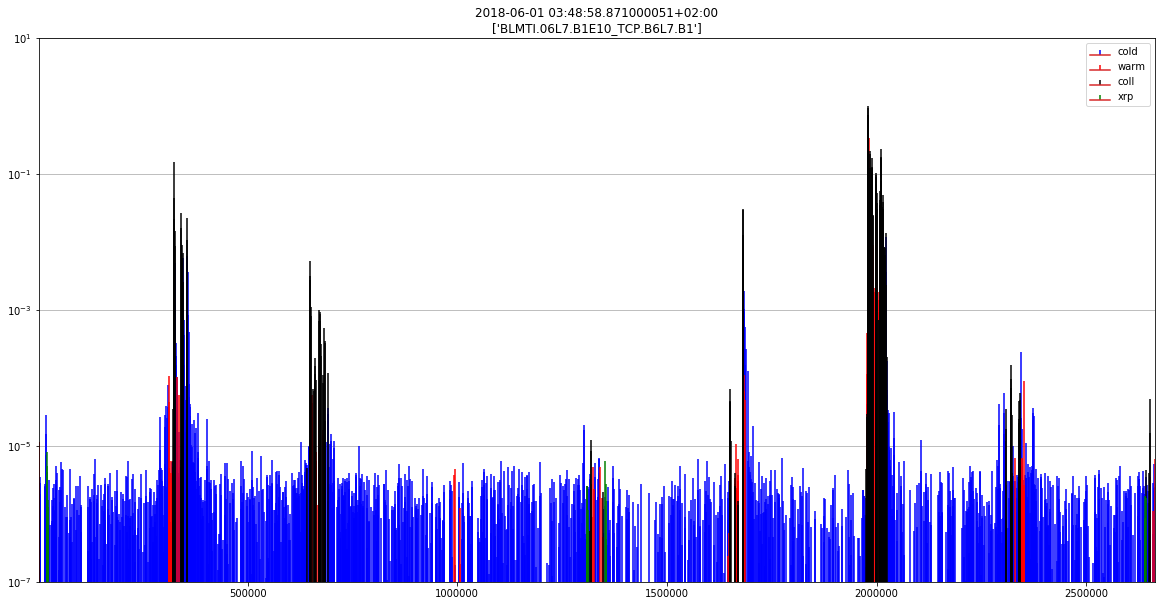

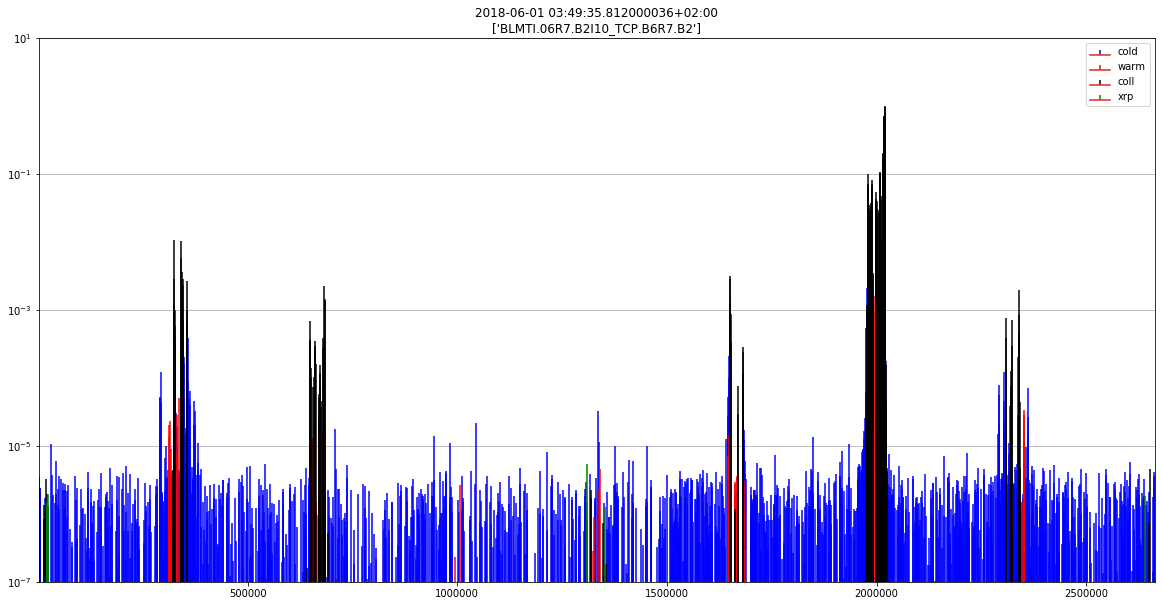

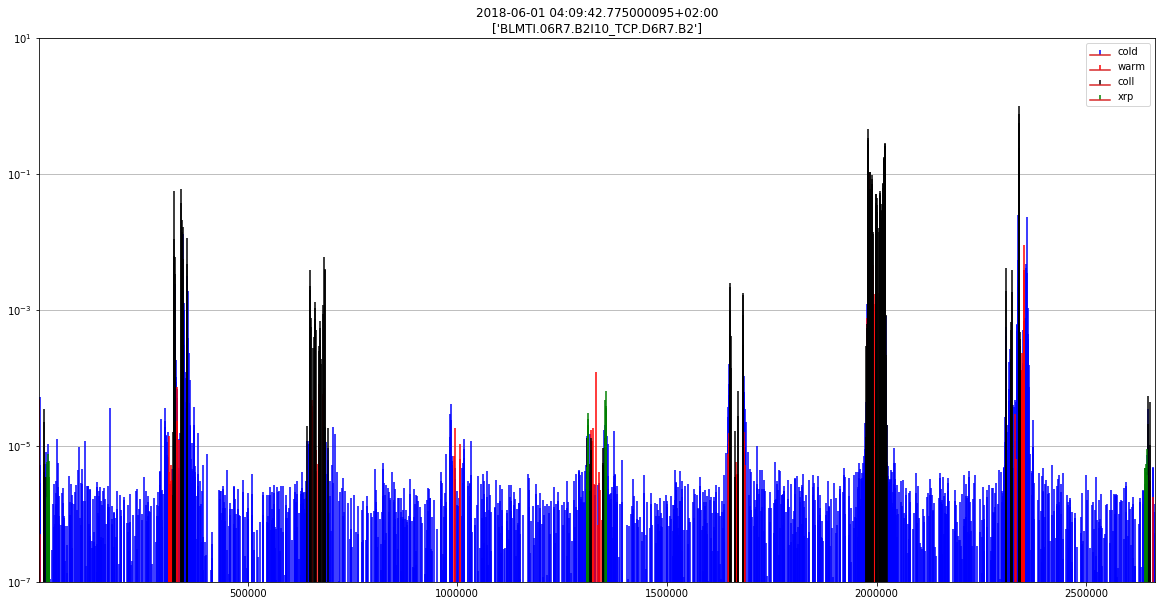

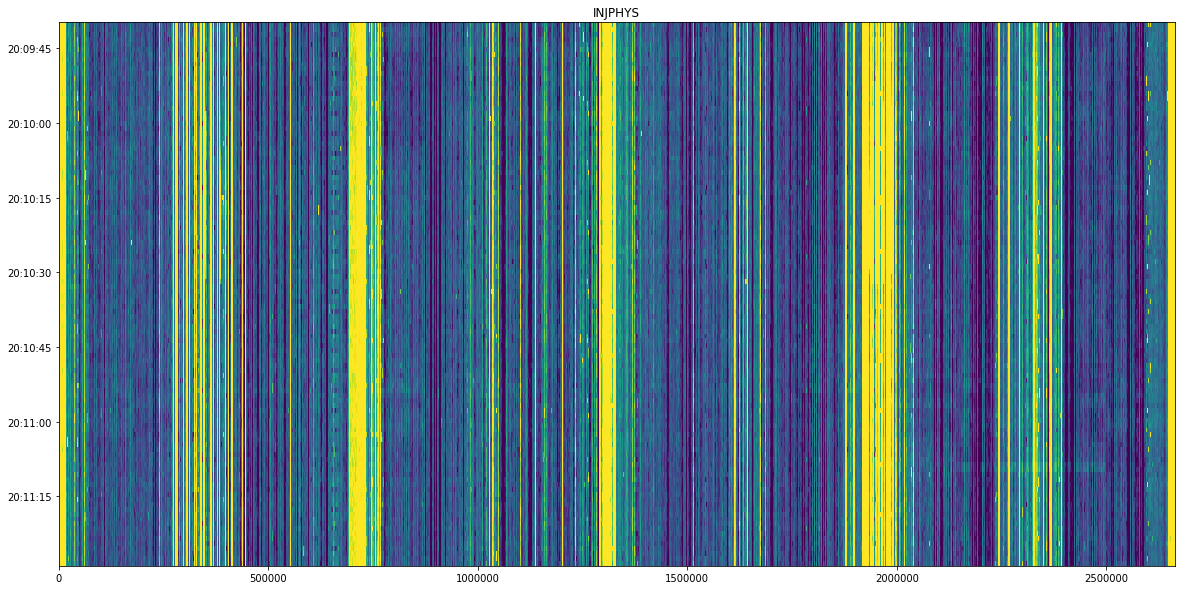

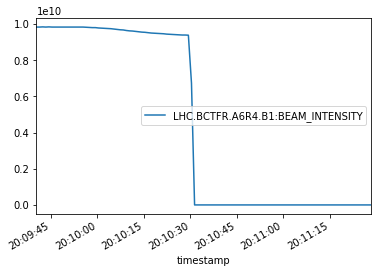

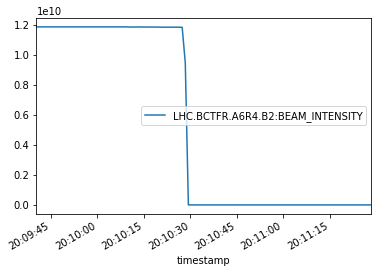

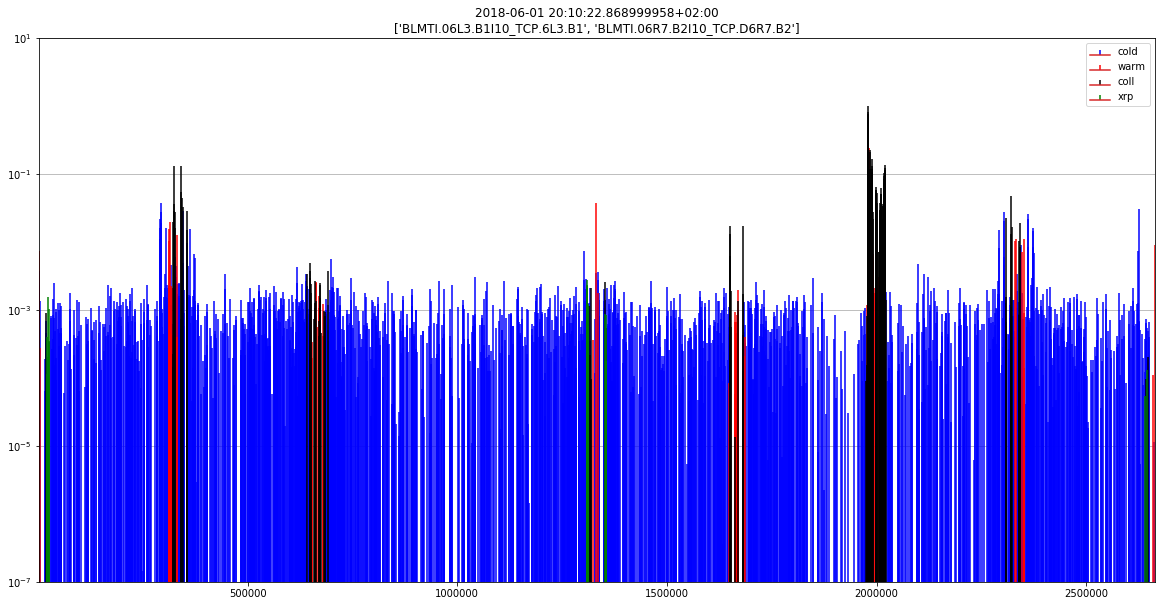

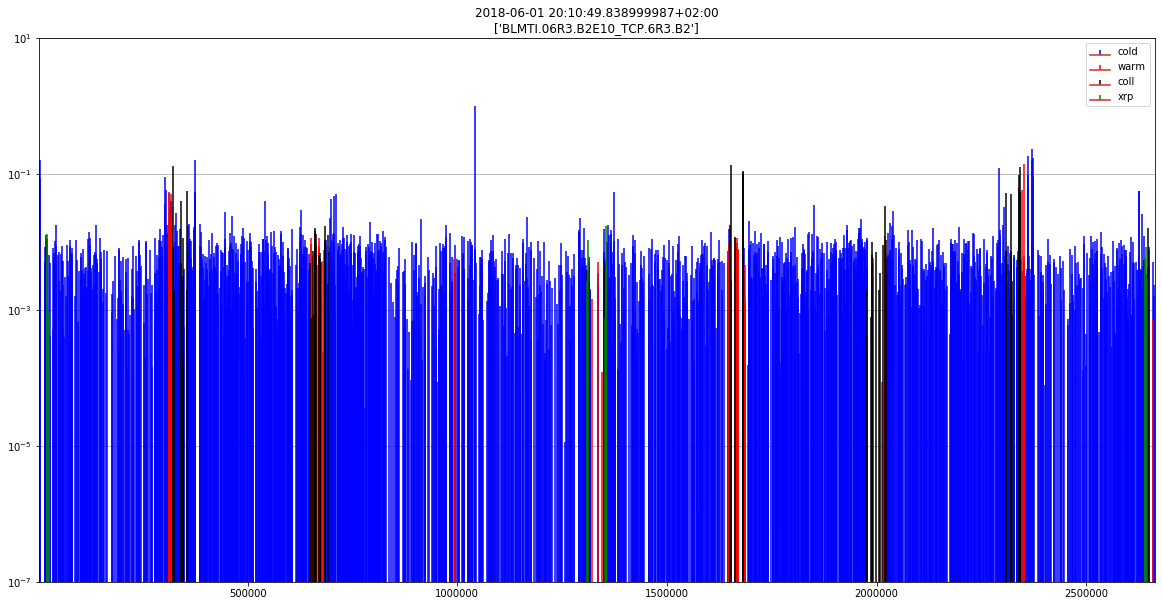

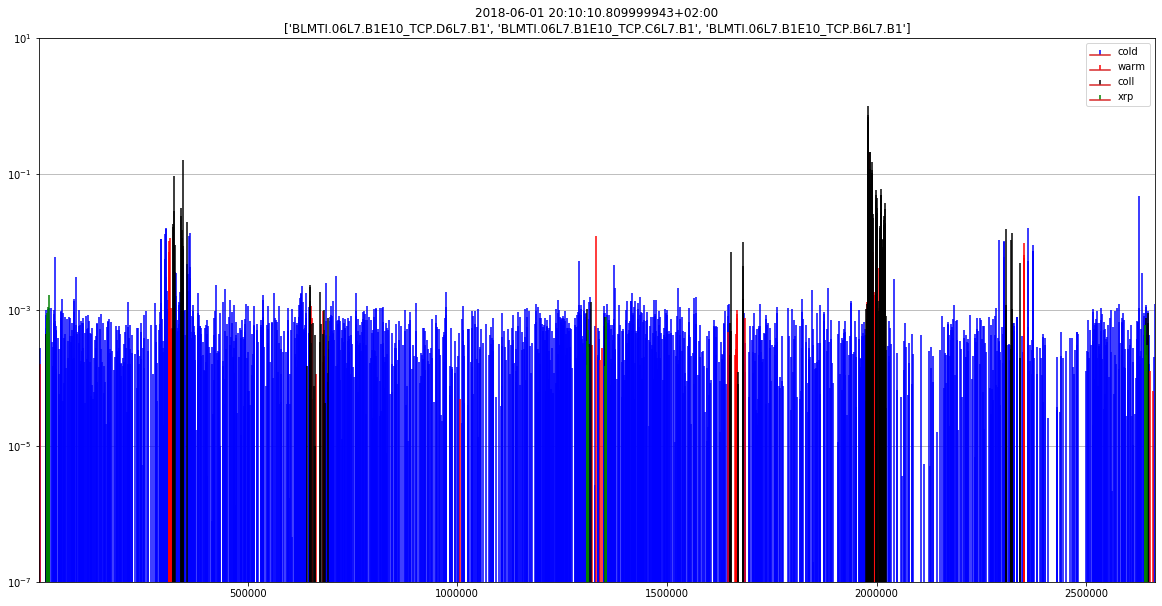

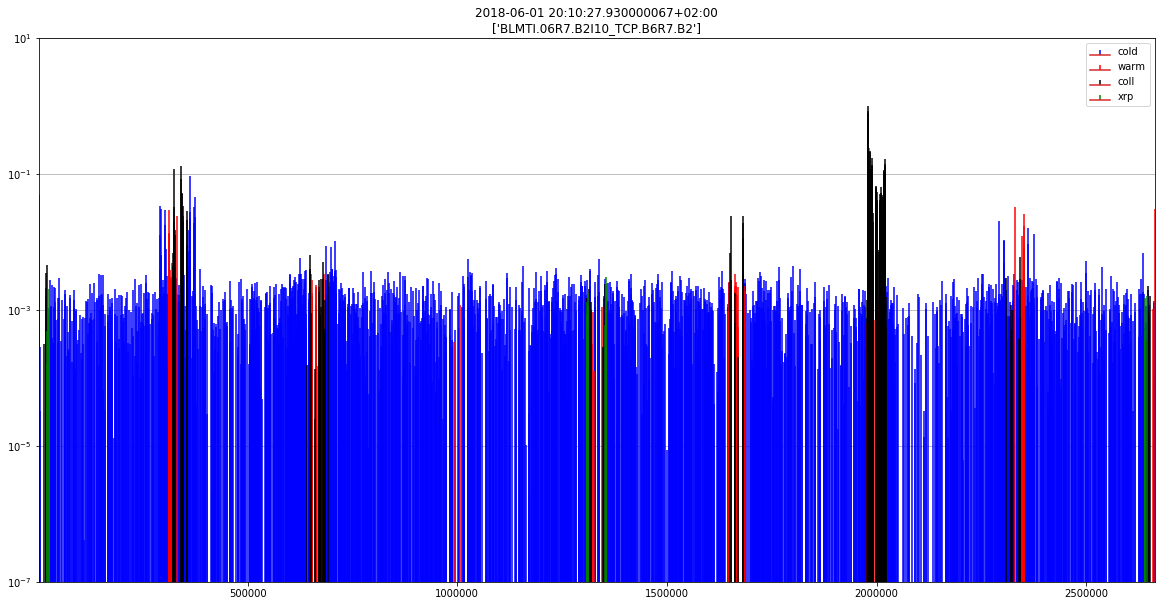

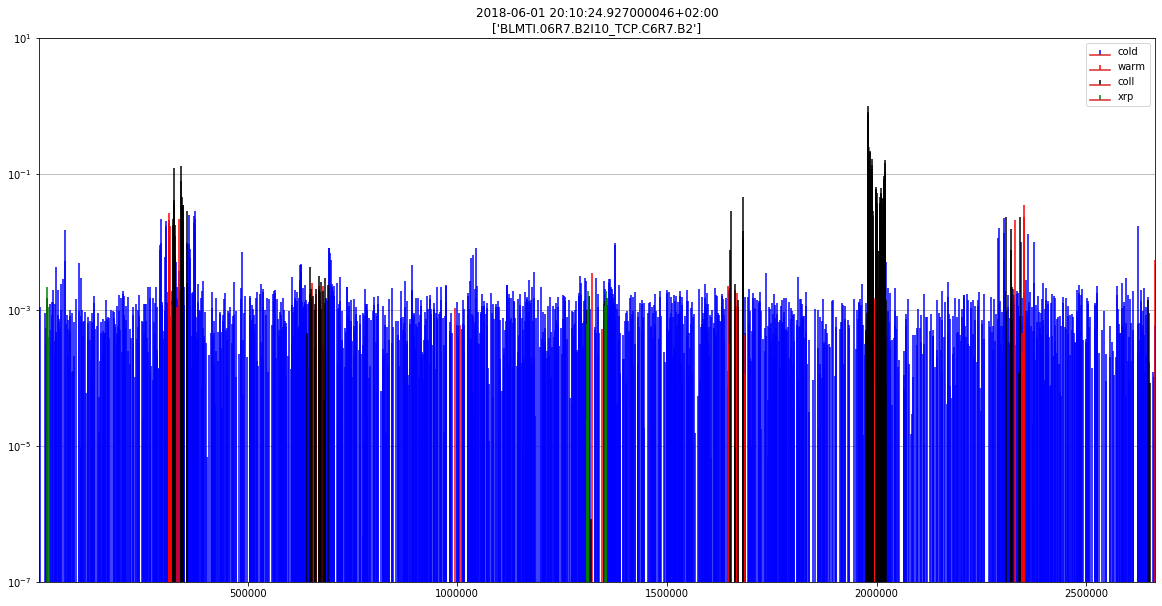

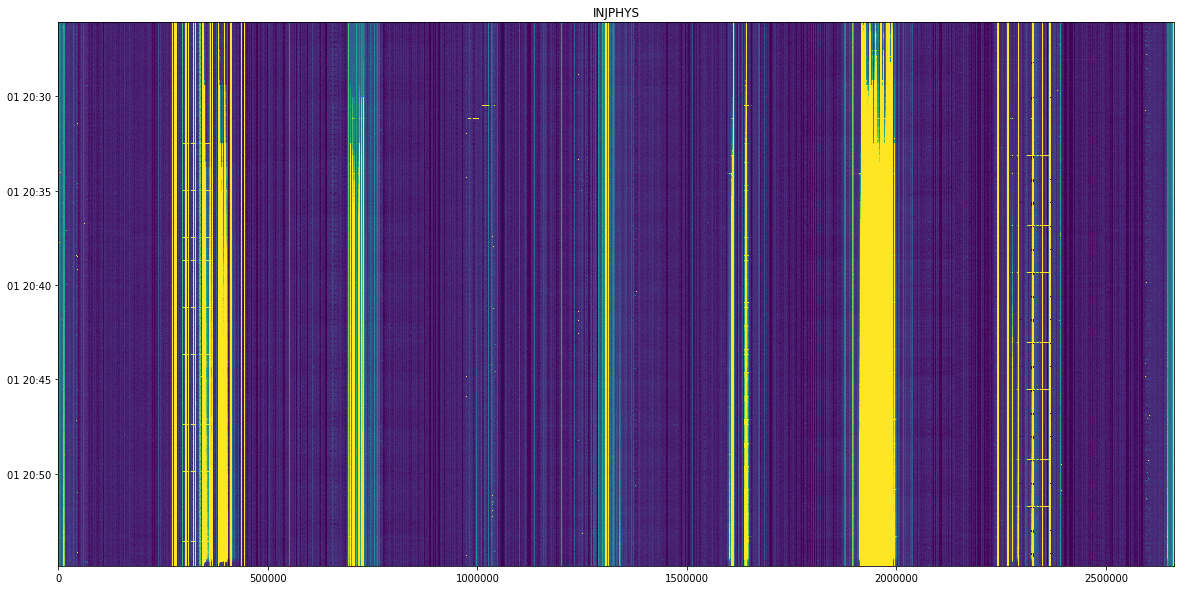

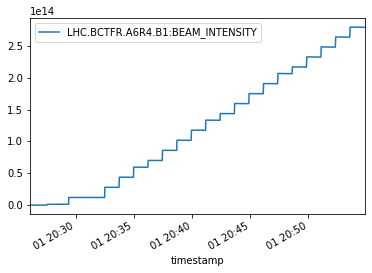

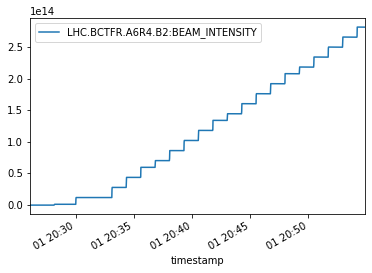

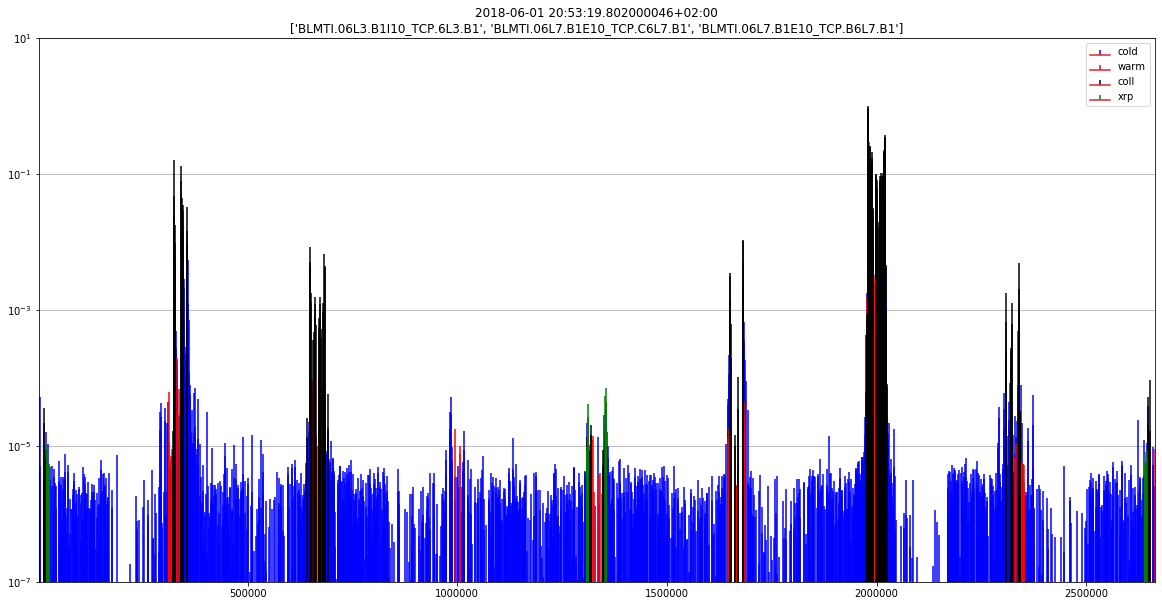

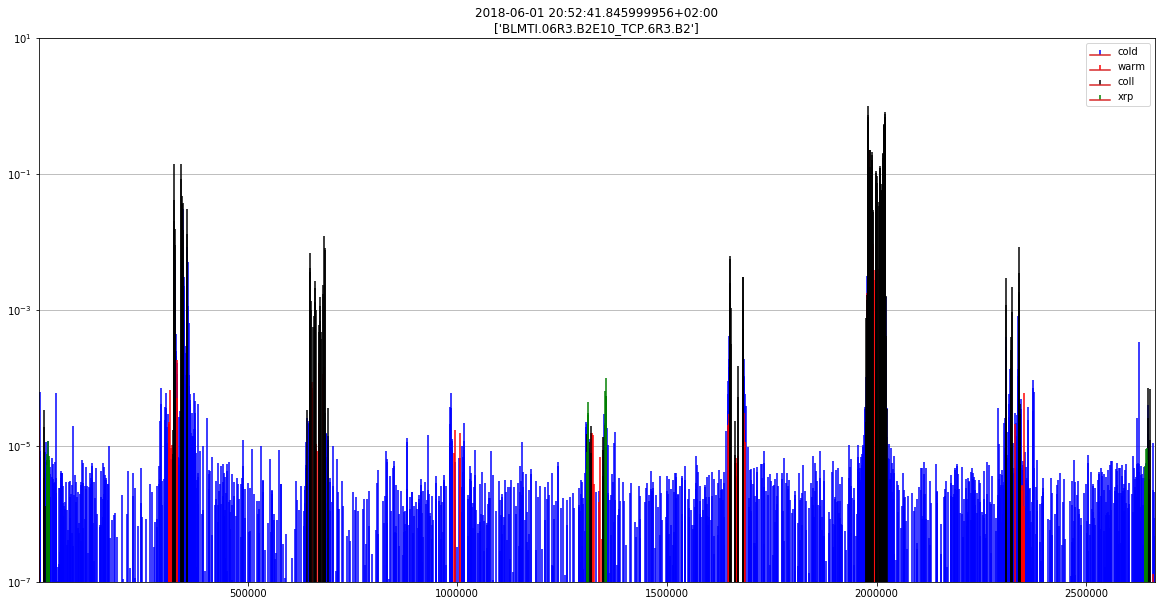

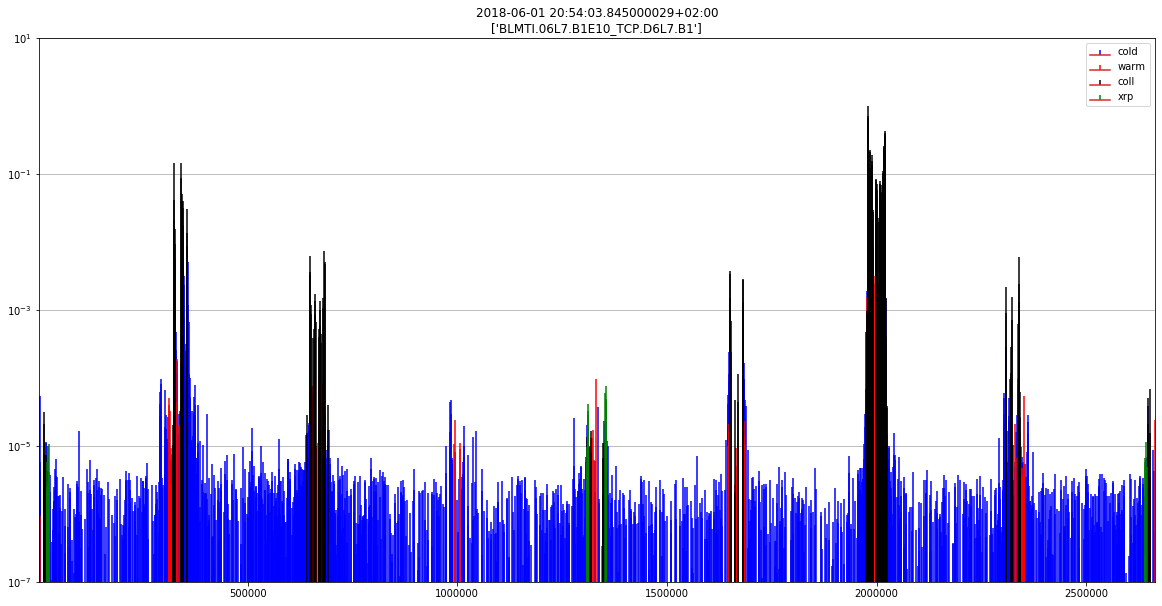

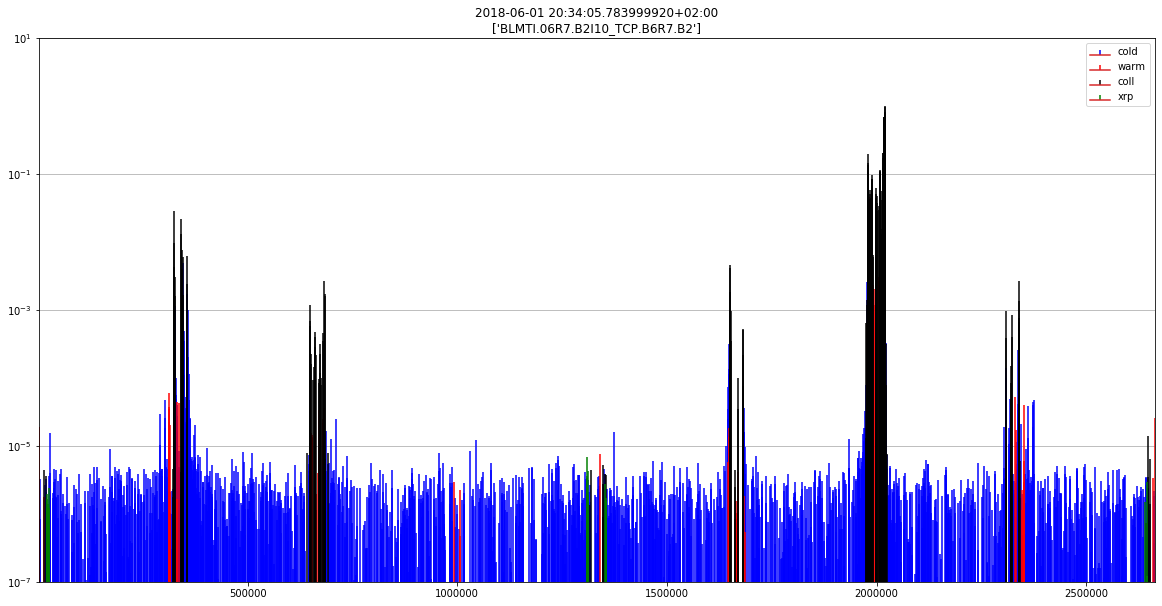

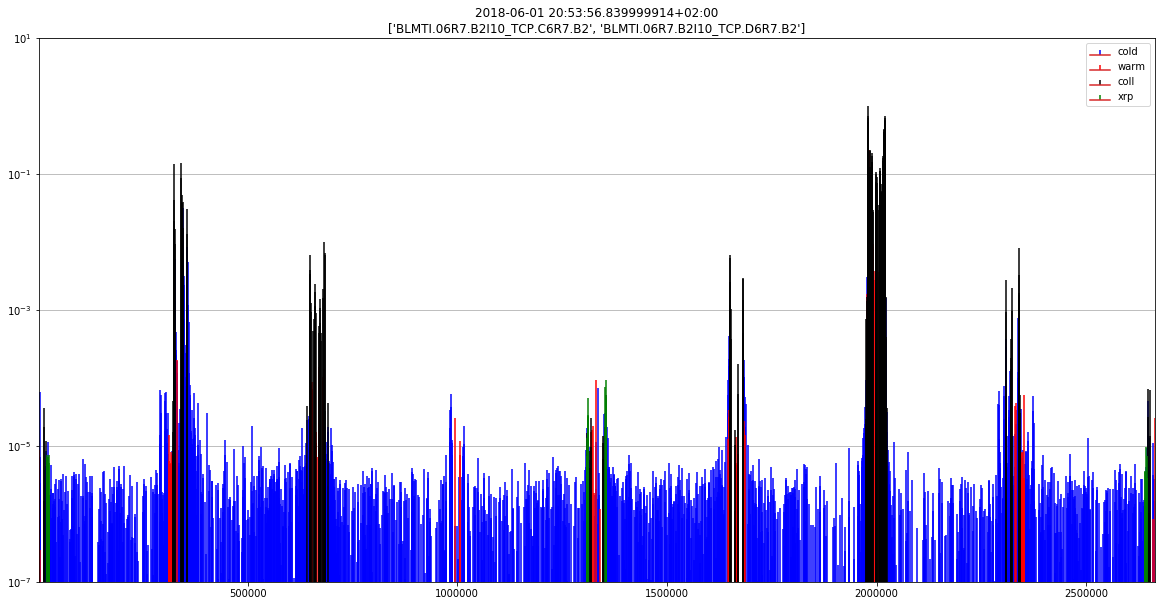

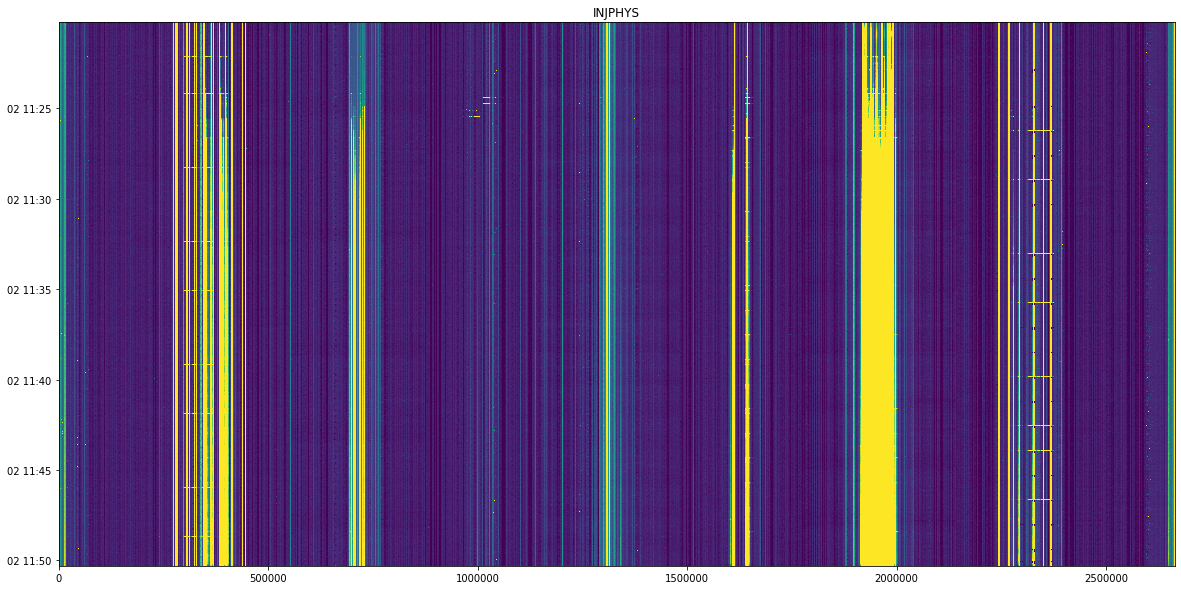

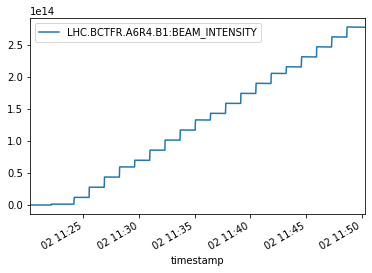

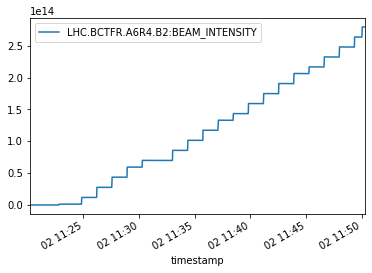

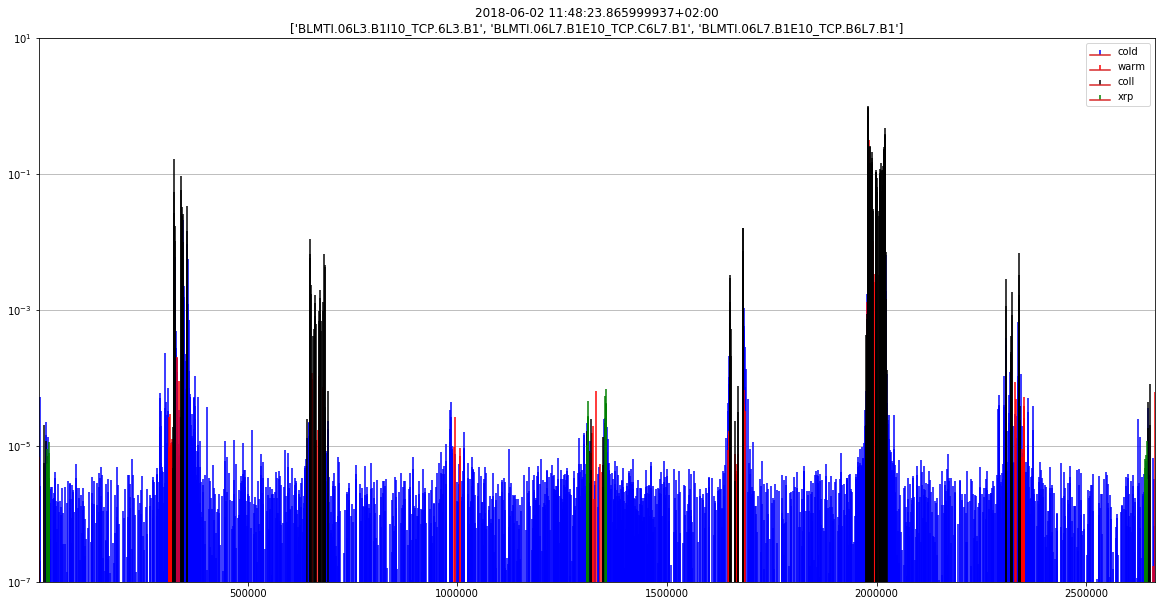

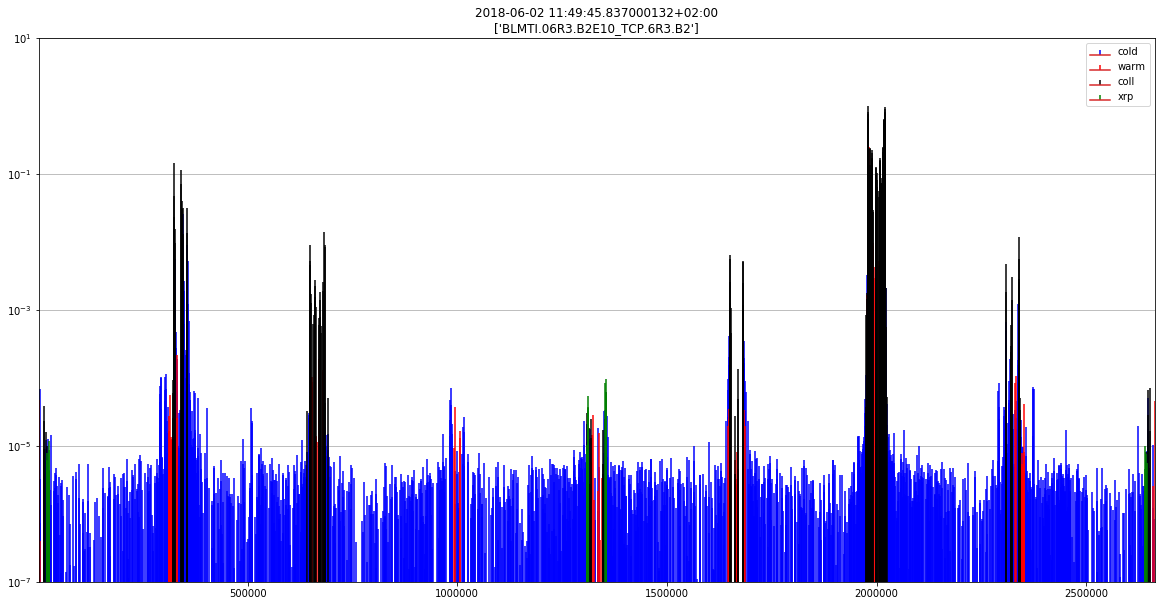

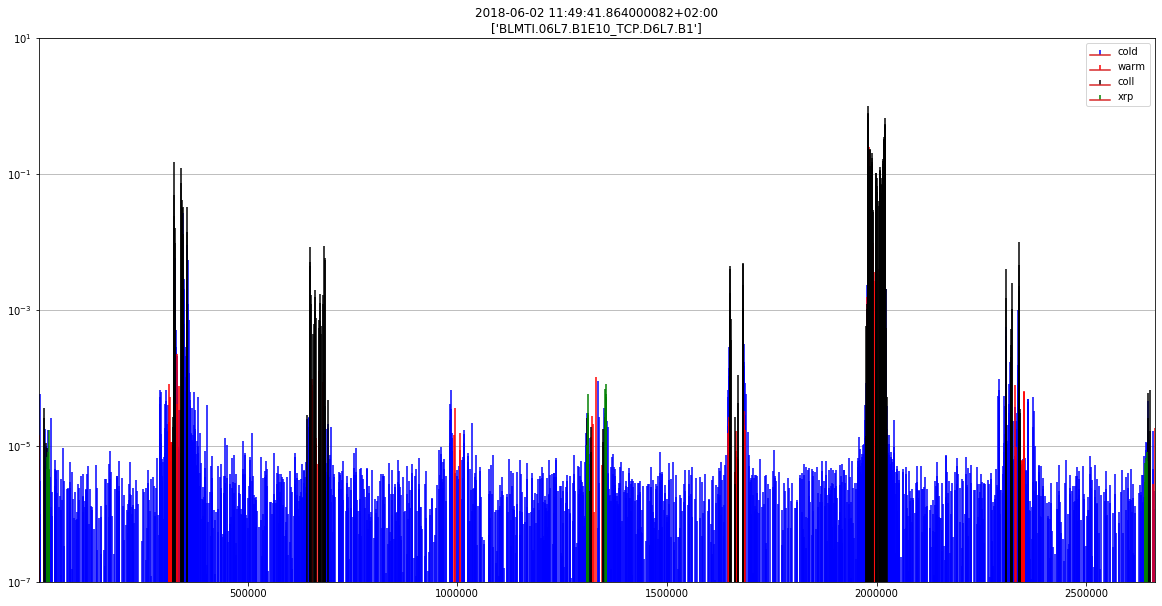

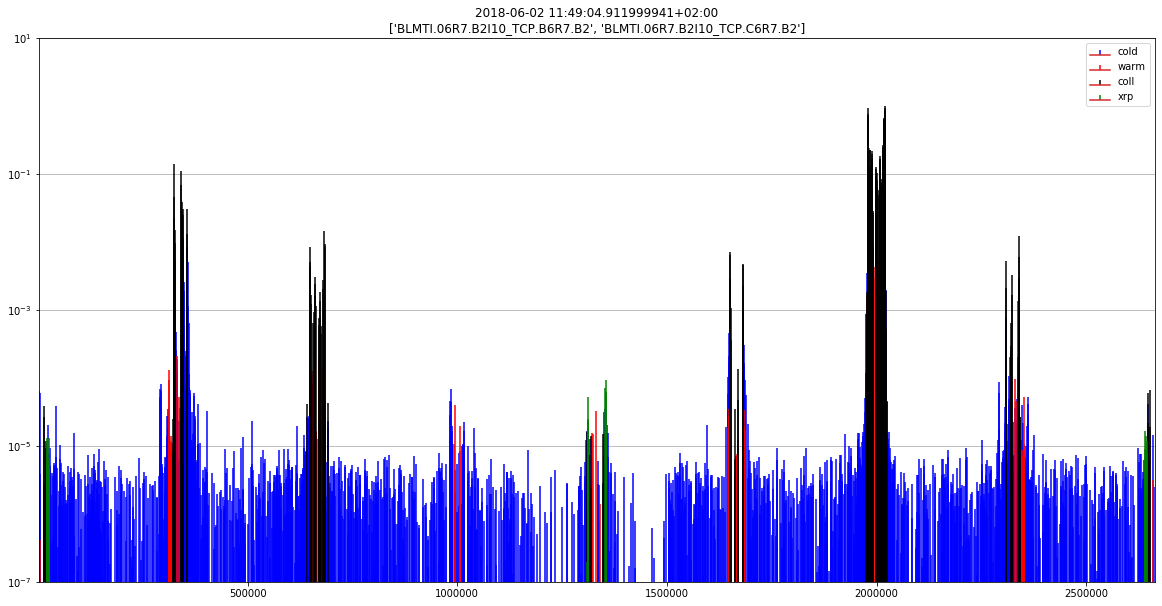

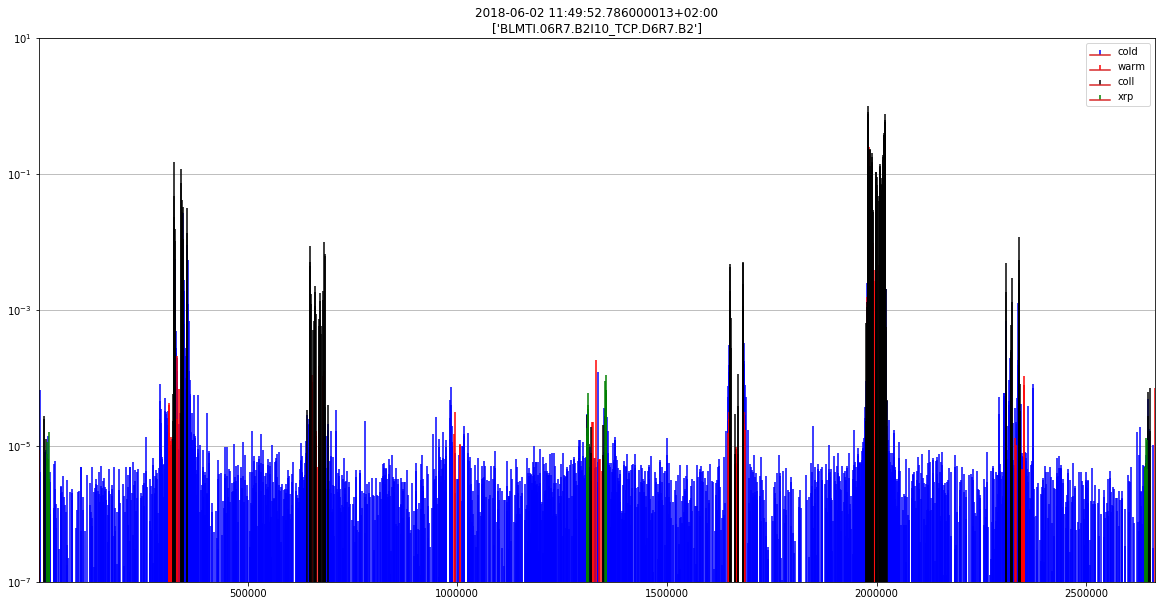

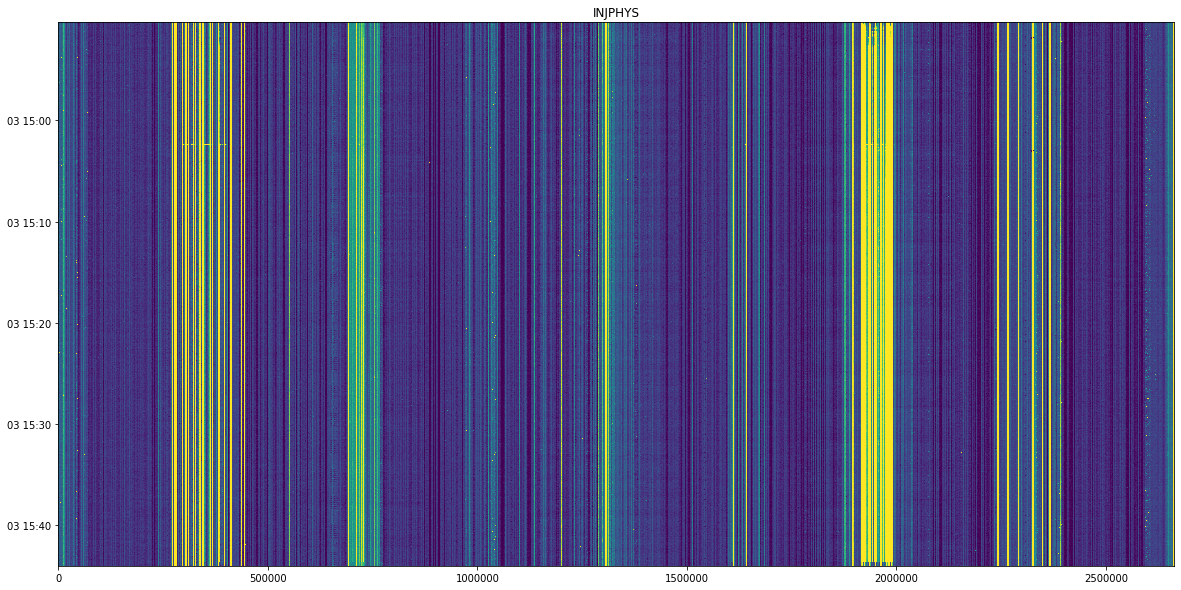

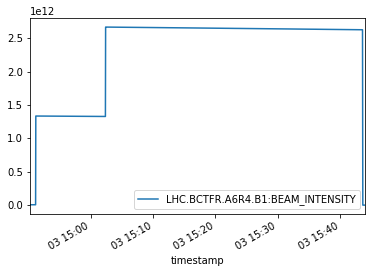

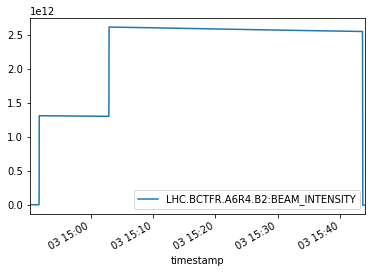

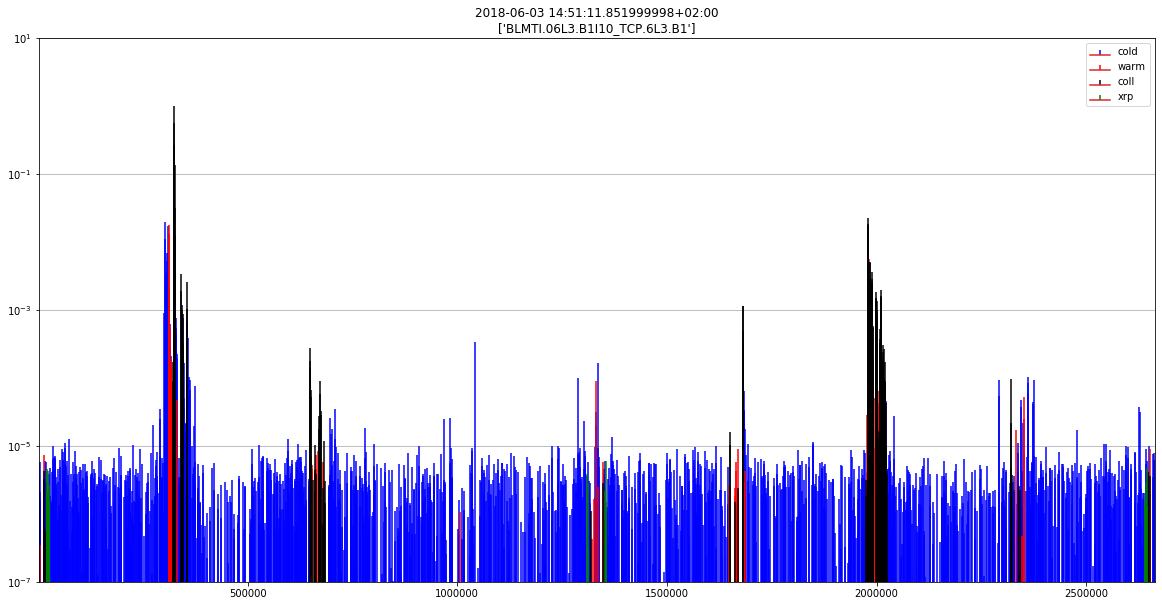

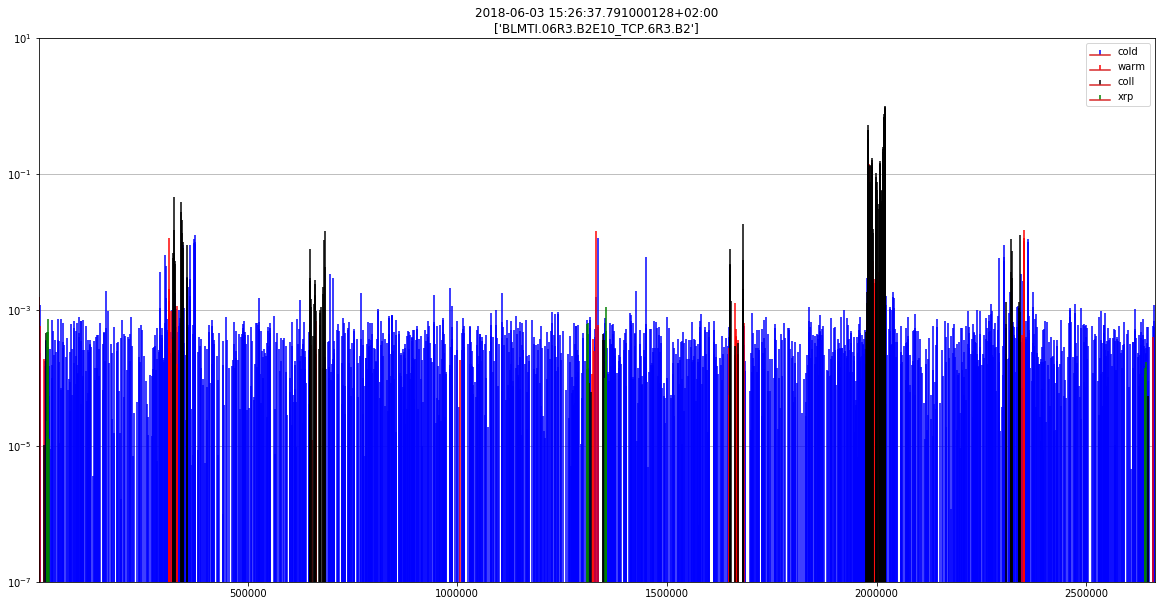

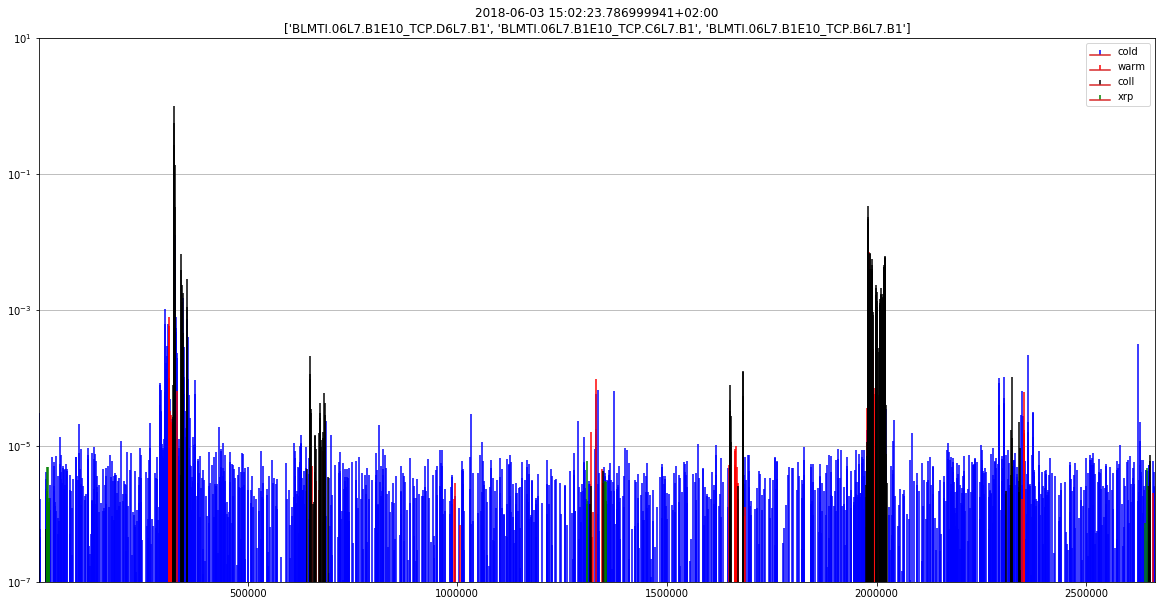

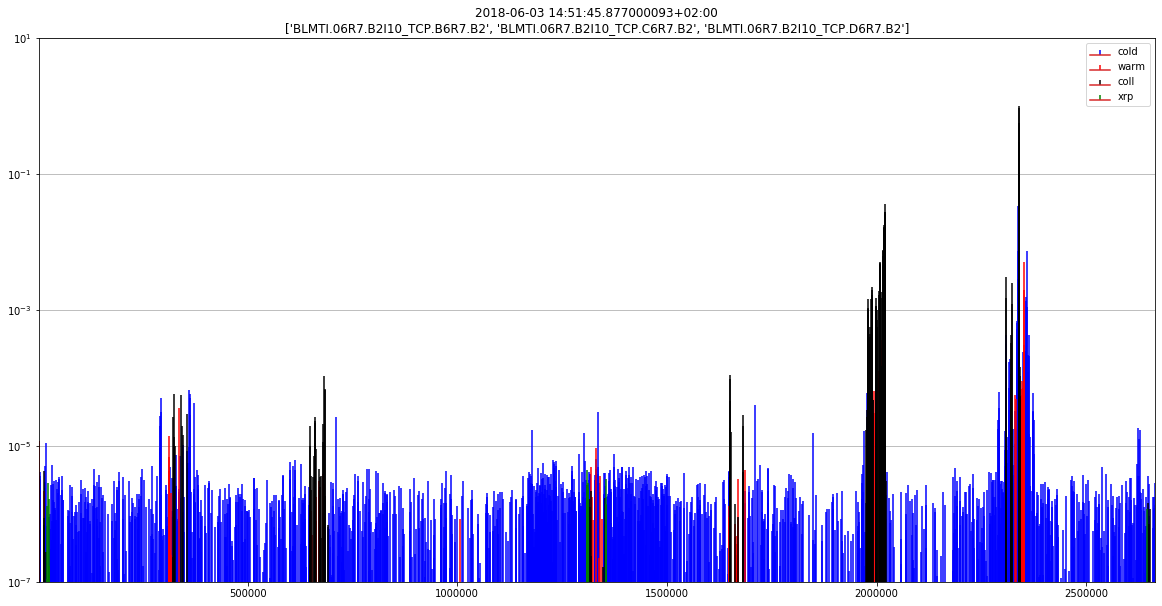

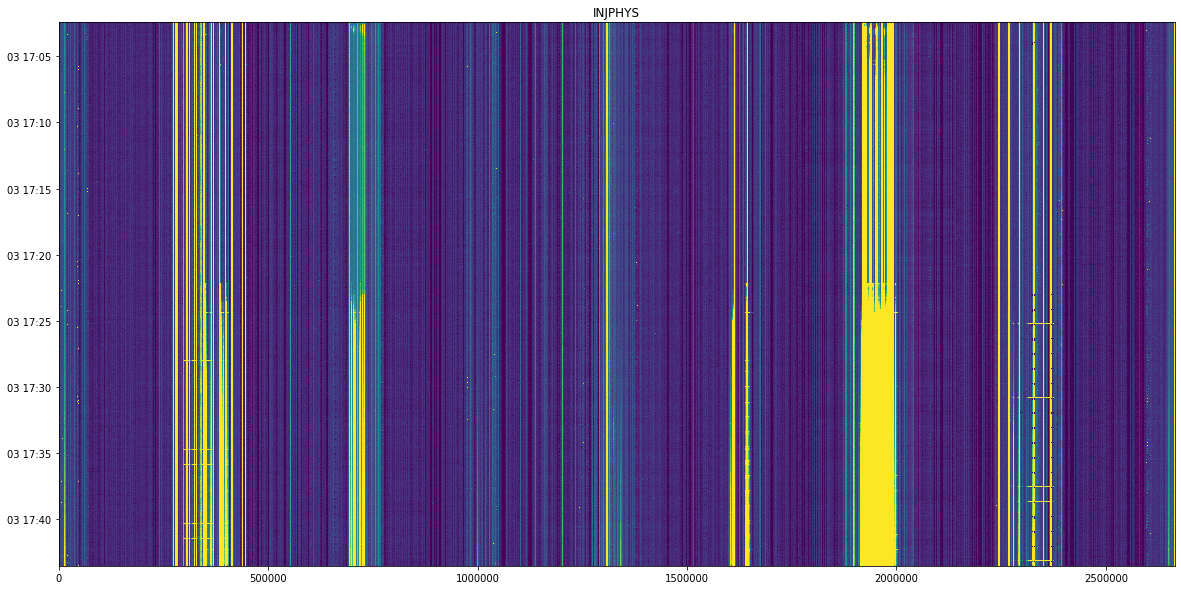

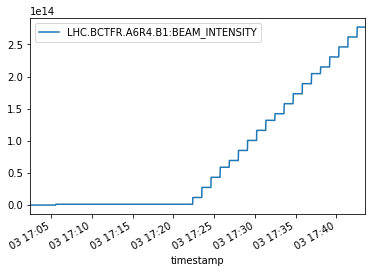

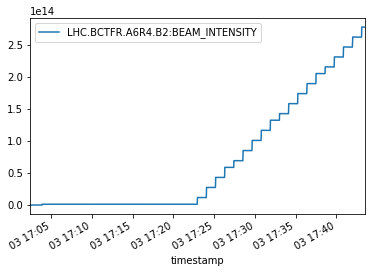

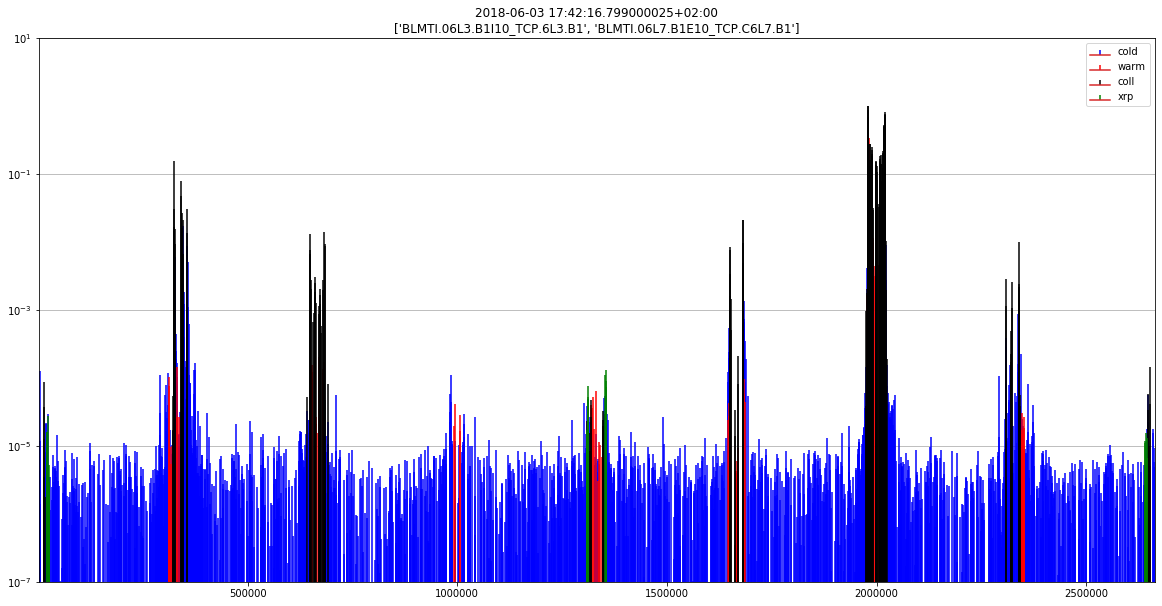

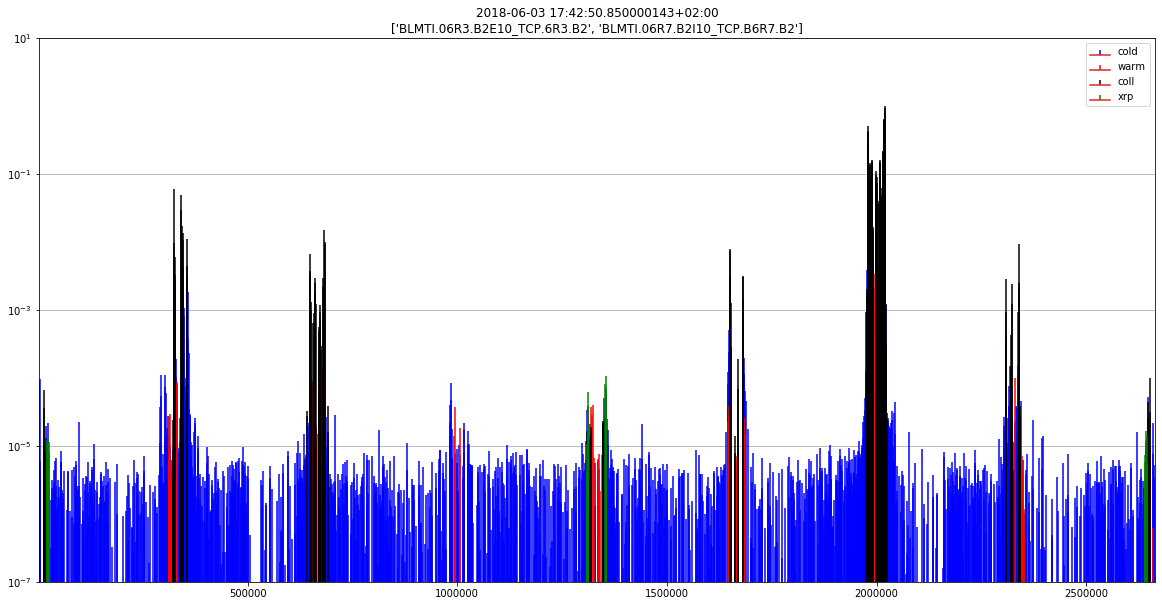

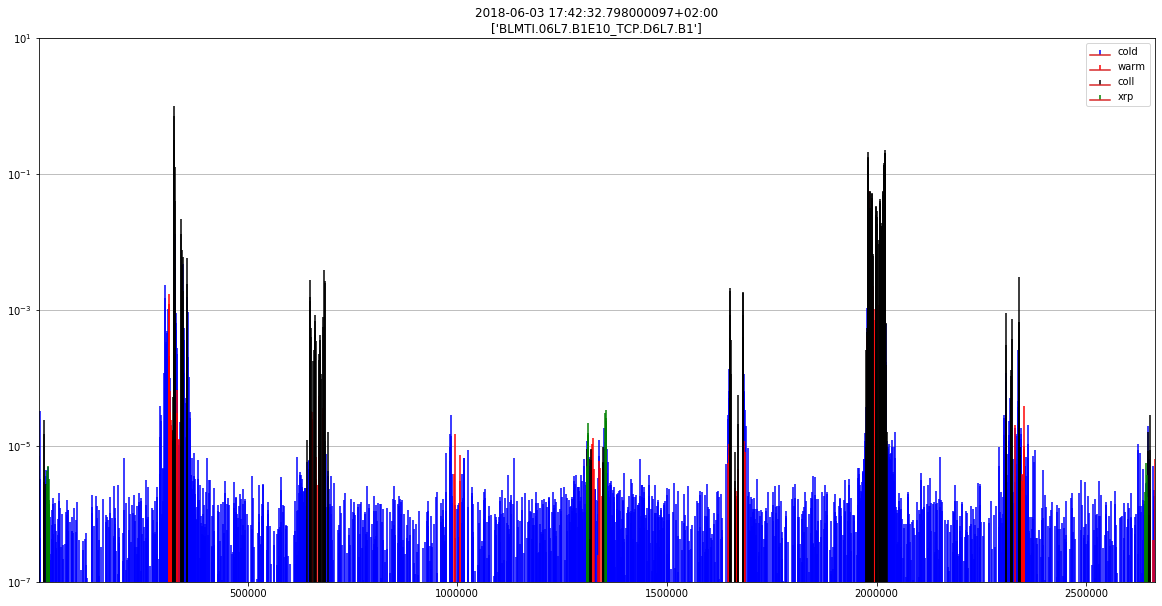

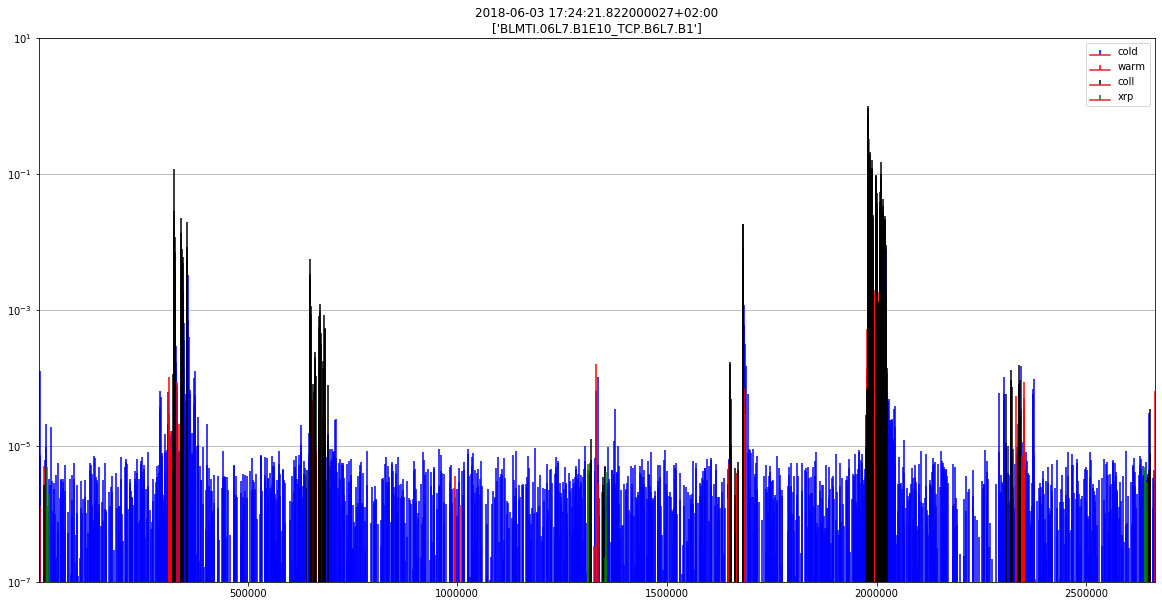

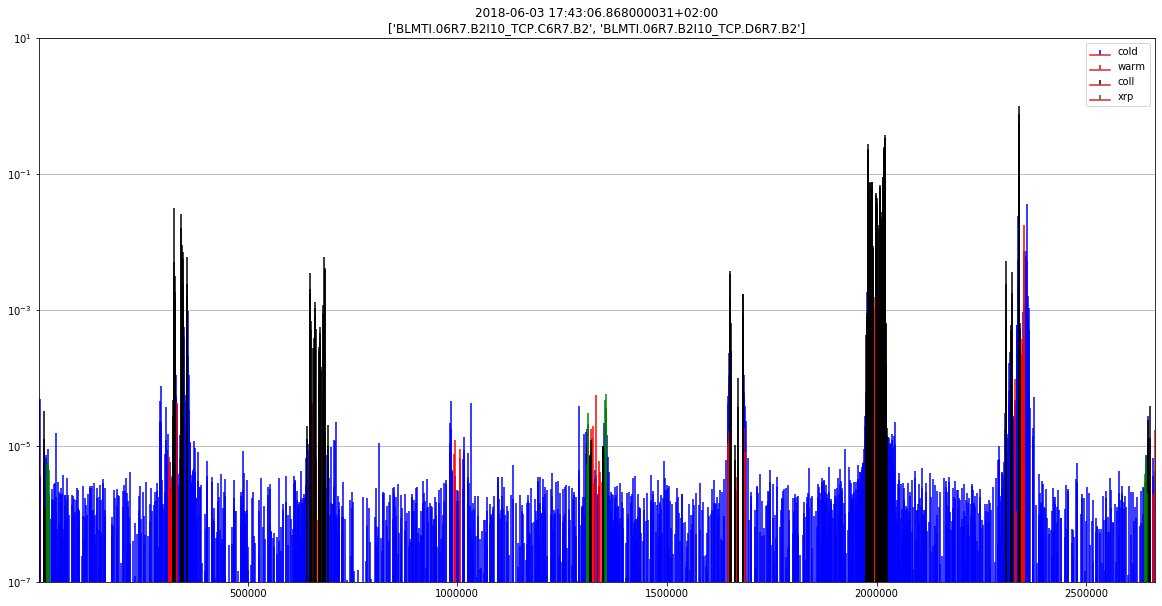

In [7]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['INJPHYS'])
OP_LM_plot(fills, 'INJPHYS')

# RAMP

In [ ]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['RAMP'])
OP_LM_plot(fills, 'RAMP')

# SQUEEZE

In [ ]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['SQUEEZE'])
OP_LM_plot(fills, 'SQUEEZE')

# ADJUST

In [ ]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['ADJUST'])
OP_LM_plot(fills, 'ADJUST')

# FLATTOP

In [ ]:
fills = db.getLHCFillsByTime(t1, t2, beam_modes=['FLATTOP'])
OP_LM_plot(fills, 'FLATTOP')